In [1]:
import numpy as np
import os
from keras.layers import Conv3D, MaxPooling3D
from keras.layers import Dense, Dropout, Flatten
from keras.models import Sequential
from keras.layers import Activation, ZeroPadding3D, TimeDistributed, LSTM, GRU, Reshape
#from keras.utils import plot_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import gc
from sklearn.metrics import classification_report, balanced_accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
from sklearn.preprocessing import LabelEncoder
import sklearn
import seaborn as sns
import tensorflow as tf
from keras import regularizers
from tensorflow.keras.utils import to_categorical
from prettytable import PrettyTable
from matplotlib import pyplot as plt

import time

# VGG_lstm


# Model Summary

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Input, Reshape
from sklearn.model_selection import KFold
from tensorflow.keras.applications import MobileNetV2, VGG16
import time

# Define constants
IMAGE_SIZE = (96, 72)
BATCH_SIZE = 16
EPOCHS = 100
NUM_CLASSES = 17  # Update this to the correct number of classes in your dataset
TRAIN_DATA_DIR = "C:\\Users\\sumit\\Downloads\\Noise reduction 2\\output_denoised_image_folder"
K_FOLDS = 5

# Load the data
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

data_generator = datagen.flow_from_directory(
    TRAIN_DATA_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

# Initialize KFold
kf = KFold(n_splits=K_FOLDS, shuffle=True)

# Initialize arrays to store accuracies and computational times
train_accuracies = []
val_accuracies = []

comp_times = []

# Load pre-trained VGG-16 model, excluding the top classifier layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))

# Freeze pre-trained layers to prevent them from being updated during training
for layer in base_model.layers:
    layer.trainable = False

# Define the model architecture
inputs = Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))  # Input layer for images

# Extract features using VGG-16
vgg_features = base_model(inputs)

# **Reshape features to ensure compatibility with LSTM (remove unnecessary dimension):**
# Adjust the shape based on the actual dimensions of `vgg_features` (e.g., if features are (None, 7, 7, 512), reshape to (None, 7, 512))
desired_feature_shape = (vgg_features.shape[1], vgg_features.shape[2] * vgg_features.shape[3])  # Calculate desired shape
reshaped_features = Reshape(desired_feature_shape)(vgg_features)

# Define the LSTM-based classifier
lstm_1 = LSTM(128, return_sequences=True)(reshaped_features)  # First LSTM layer
lstm_2 = LSTM(32)(lstm_1)                                     # Second LSTM layer

Dropout(0.7)
# Final dense layer for classification
predictions = Dense(NUM_CLASSES, activation='softmax')(lstm_2)

# Create the final model
model = tf.keras.Model(inputs=inputs, outputs=predictions)
# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(clipnorm=1),  # Create Adam optimizer with clipnorm
              loss='categorical_crossentropy',
              metrics=['accuracy'],
              run_eagerly=True,  # Enables early stopping callbacks
              )


Found 417 images belonging to 17 classes.


In [3]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 96, 72, 3)]       0         
                                                                 
 vgg16 (Functional)          (None, 3, 2, 512)         14714688  
                                                                 
 reshape (Reshape)           (None, 3, 1024)           0         
                                                                 
 lstm (LSTM)                 (None, 3, 128)            590336    
                                                                 
 lstm_1 (LSTM)               (None, 32)                20608     
                                                                 
 dense (Dense)               (None, 17)                561       
                                                                 
Total params: 15,326,193
Trainable params: 611,505
Non-traina

# Model Training

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Input, Reshape
from sklearn.model_selection import KFold
from tensorflow.keras.applications import MobileNetV2, VGG16
import time

# Define constants
IMAGE_SIZE = (96, 72)
BATCH_SIZE = 16
EPOCHS = 100
NUM_CLASSES = 17  # Update this to the correct number of classes in your dataset
TRAIN_DATA_DIR = "C:\\Users\\sumit\\Downloads\\Noise reduction 2\\output_denoised_image_folder"
K_FOLDS = 5

# Load the data
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

data_generator = datagen.flow_from_directory(
    TRAIN_DATA_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

# Initialize KFold
kf = KFold(n_splits=K_FOLDS, shuffle=True)

# Initialize arrays to store accuracies and computational times
train_accuracies = []
val_accuracies = []

comp_times = []

# Load pre-trained VGG-16 model, excluding the top classifier layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))

# Freeze pre-trained layers to prevent them from being updated during training
for layer in base_model.layers:
    layer.trainable = False

# Define the model architecture
inputs = Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))  # Input layer for images

# Extract features using VGG-16
vgg_features = base_model(inputs)

# **Reshape features to ensure compatibility with LSTM (remove unnecessary dimension):**
# Adjust the shape based on the actual dimensions of `vgg_features` (e.g., if features are (None, 7, 7, 512), reshape to (None, 7, 512))
desired_feature_shape = (vgg_features.shape[1], vgg_features.shape[2] * vgg_features.shape[3])  # Calculate desired shape
reshaped_features = Reshape(desired_feature_shape)(vgg_features)

# Define the LSTM-based classifier
lstm_1 = LSTM(128, return_sequences=True)(reshaped_features)  # First LSTM layer
lstm_2 = LSTM(32)(lstm_1)                                     # Second LSTM layer

Dropout(0.7)
# Final dense layer for classification
predictions = Dense(NUM_CLASSES, activation='softmax')(lstm_2)

# Create the final model
model = tf.keras.Model(inputs=inputs, outputs=predictions)
# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(clipnorm=1),  # Create Adam optimizer with clipnorm
              loss='categorical_crossentropy',
              metrics=['accuracy'],
              run_eagerly=True,  # Enables early stopping callbacks
              )

# Track start time
start_time = time.time()

# K-fold cross-validation loop
for fold, (train_index, val_index) in enumerate(kf.split(data_generator), 1):
    train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        validation_split=0.2
    ).flow_from_directory(
        TRAIN_DATA_DIR,
        target_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        shuffle=True,
        subset='training',
        seed=42
    )

    validation_generator = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        validation_split=0.2
    ).flow_from_directory(
        TRAIN_DATA_DIR,
        target_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        shuffle=False,
        subset='validation',
        seed=42
    )

    # Train the model
    history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // BATCH_SIZE,
        epochs=EPOCHS,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // BATCH_SIZE,
        verbose=1
    )

    # Evaluate the model
    train_loss, train_acc = model.evaluate(train_generator)
    val_loss, val_acc = model.evaluate(validation_generator)

    print(f"Fold {fold}:")
    print(f"Train accuracy: {train_acc}, Validation accuracy: {val_acc}")
    print(f"Training time for fold {fold}: {time.time() - start_time} seconds\n")

    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)
    comp_times.append(time.time() - start_time)

    # Save the model for this fold
    model.save(f'VGG-lstm_kfold(1)_{fold}.h5')

# Track end time
end_time = time.time()

print("K-Fold Cross Validation Complete.")
# Print average accuracies and computational time
print("Average Training Accuracy:", np.mean(train_accuracies)*100,"%")
print("Average Validation Accuracy:", np.mean(val_accuracies)*100,"%")
print("Average Training Time:", np.mean(comp_times))
print("Total Training Time:", end_time - start_time)


Found 417 images belonging to 17 classes.
Found 339 images belonging to 17 classes.
Found 78 images belonging to 17 classes.
Epoch 1/100
21/21 [==============================] - 7s 178ms/step - loss: 2.8408 - accuracy: 0.0650 - val_loss: 2.8293 - val_accuracy: 0.0781
Epoch 2/100
21/21 [==============================] - 2s 111ms/step - loss: 2.8334 - accuracy: 0.0743 - val_loss: 2.8314 - val_accuracy: 0.0781
Epoch 3/100
21/21 [==============================] - 2s 111ms/step - loss: 2.8314 - accuracy: 0.0712 - val_loss: 2.8306 - val_accuracy: 0.0781
Epoch 4/100
21/21 [==============================] - 2s 110ms/step - loss: 2.8304 - accuracy: 0.0681 - val_loss: 2.8296 - val_accuracy: 0.0781
Epoch 5/100
21/21 [==============================] - 2s 110ms/step - loss: 2.8285 - accuracy: 0.0681 - val_loss: 2.8271 - val_accuracy: 0.0781
Epoch 6/100
21/21 [==============================] - 2s 109ms/step - loss: 2.8283 - accuracy: 0.0743 - val_loss: 2.8259 - val_accuracy: 0.0781
Epoch 7/100
21/21

# Training accuracy

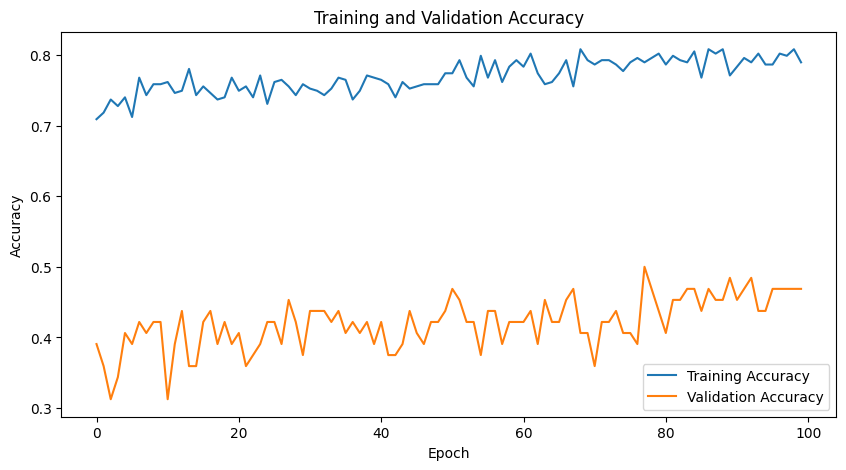

In [6]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# ROC CURVE

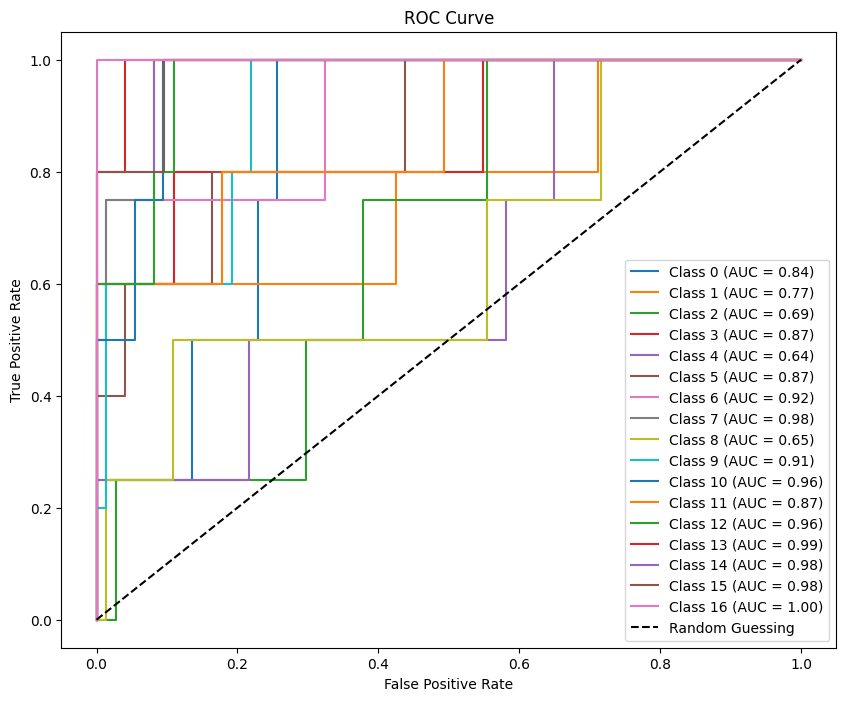

In [7]:
y_pred = model.predict(validation_generator)
y_true = validation_generator.classes
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(NUM_CLASSES):
    fpr[i], tpr[i], _ = roc_curve((y_true == i).astype(int), y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(10, 8))
for i in range(NUM_CLASSES):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Confusion Matrix

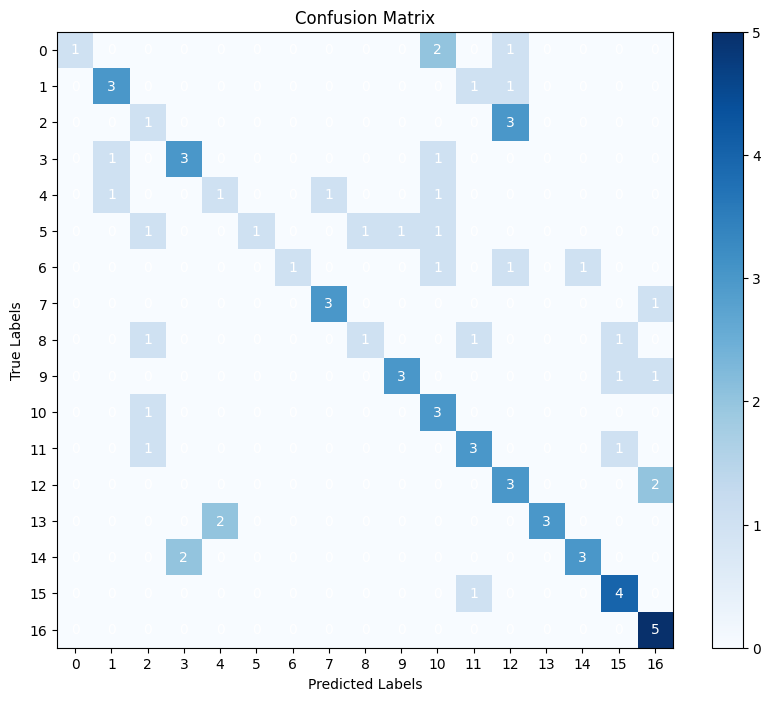

In [8]:
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_true, np.argmax(y_pred, axis=1))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(np.arange(NUM_CLASSES))
plt.yticks(np.arange(NUM_CLASSES))
for i in range(NUM_CLASSES):
    for j in range(NUM_CLASSES):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()


# F1 score support

In [9]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
from prettytable import PrettyTable
import pandas as pd
import time

# Assuming you already have the necessary variables defined in your code
train_predictions = model.predict(train_generator)
validation_predictions = model.predict(validation_generator)

# Convert predictions to class labels
train_pred_labels = np.argmax(train_predictions, axis=1)
validation_pred_labels = np.argmax(validation_predictions, axis=1)

# True labels for training and validation sets
train_true_labels = train_generator.classes
validation_true_labels = validation_generator.classes

# Calculate metrics
train_report = classification_report(train_true_labels, train_pred_labels, target_names=train_generator.class_indices)
validation_report = classification_report(validation_true_labels, validation_pred_labels, target_names=validation_generator.class_indices)

# Additional metrics using confusion matrix
train_conf_matrix = confusion_matrix(train_true_labels, train_pred_labels)
validation_conf_matrix = confusion_matrix(validation_true_labels, validation_pred_labels)

# Calculate precision, recall, F1 score, and support
train_precision, train_recall, train_f1_score, train_support = precision_recall_fscore_support(train_true_labels, train_pred_labels)
validation_precision, validation_recall, validation_f1_score, validation_support = precision_recall_fscore_support(validation_true_labels, validation_pred_labels)

# Create PrettyTable for training metrics
train_table = PrettyTable()
train_table.field_names = ["Class", "Precision", "Recall", "F1 Score", "Support"]

# Populate the table with training metrics
for class_name, precision, recall, f1_score, support in zip(
        train_generator.class_indices.keys(),
        train_precision,
        train_recall,
        train_f1_score,
        train_support
):
    train_table.add_row([class_name, precision, recall, f1_score, support])

# Create PrettyTable for validation metrics
validation_table = PrettyTable()
validation_table.field_names = ["Class", "Precision", "Recall", "F1 Score", "Support"]

# Populate the table with validation metrics
for class_name, precision, recall, f1_score, support in zip(
        validation_generator.class_indices.keys(),
        validation_precision,
        validation_recall,
        validation_f1_score,
        validation_support
):
    validation_table.add_row([class_name, precision, recall, f1_score, support])

# Print tables
print("Training Metrics:")
print(train_table)

print("\nValidation Metrics:")
print(validation_table)

# ... (your existing code)

# Create DataFrames for training and validation metrics
train_df = pd.DataFrame({
    'Dataset': 'Training',
    'Class': list(train_generator.class_indices.keys()),
    'Precision': train_precision,
    'Recall': train_recall,
    'F1 Score': train_f1_score,
    'Support': train_support
})

validation_df = pd.DataFrame({
    'Dataset': 'Validation',
    'Class': list(validation_generator.class_indices.keys()),
    'Precision': validation_precision,
    'Recall': validation_recall,
    'F1 Score': validation_f1_score,
    'Support': validation_support
})

# Concatenate DataFrames
combined_df = pd.concat([train_df, validation_df], ignore_index=True)

# Save combined DataFrame to an Excel sheet
combined_excel_path = 'combined_metricsVGG-lstmkfold5.xlsx'
combined_df.to_excel(combined_excel_path, index=False)

print(f"Combined metrics saved to {combined_excel_path}")



Training Metrics:
+-------+----------------------+----------------------+----------------------+---------+
| Class |      Precision       |        Recall        |       F1 Score       | Support |
+-------+----------------------+----------------------+----------------------+---------+
|   0   | 0.18181818181818182  | 0.10526315789473684  | 0.13333333333333333  |    19   |
|   1   | 0.09090909090909091  |         0.15         | 0.11320754716981132  |    20   |
|   10  | 0.05555555555555555  | 0.058823529411764705 | 0.05714285714285714  |    17   |
|   2   |         0.0          |         0.0          |         0.0          |    24   |
|   3   |         0.05         | 0.05263157894736842  | 0.05128205128205128  |    19   |
|   4   |         0.0          |         0.0          |         0.0          |    20   |
|   5   | 0.21428571428571427  | 0.17647058823529413  |  0.1935483870967742  |    17   |
|   6   | 0.09523809523809523  | 0.11764705882352941  | 0.10526315789473684  |    17   |
|  